This is a Text Analysis on all the Description part of Google Play apps. 
3292 apps in total. 

In [29]:
import nltk 
import pandas as pd 
from nltk.tokenize import *
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import *
import re
from nltk.stem import * 
from nltk import FreqDist
import math
import matplotlib 
%matplotlib inline

In [3]:
df = pd.read_excel('Whole_Subcategory.xlsx')
df.head(5)

,Subcategory,name,apppurl,review_title,review_content,content_rating,content_rating_reason+,icon_url,rating_score,rating_num,current_version,Developer,description
0,Educational,ABC Kids - Tracing & Phonics,https://play.google.com/store/apps/details?id=...,"Perfectly as stated!;Loved it, until;Lovely;Ex...",Perfectly as stated! No ads!! My 3yo can't ac...,Everyone,NaN,http://lh3.googleusercontent.com/tcbtYwJSxe_J3...,4.3,8703.0,1.1.1,RV AppStudios,"Looking for a fun, free, and simple educationa..."
1,Educational,Educational Games 4 Kids,https://play.google.com/store/apps/details?id=...,;;love;;;,My kids like to play ; My son love it ; l...,Everyone,NaN,http://lh3.googleusercontent.com/I-3t7gsJoI411...,4.2,475.0,NaN,pescAPPs,New pescAPPs game! This fun application contai...
2,Educational,Peppa Pig: Paintbox,https://play.google.com/store/apps/details?id=...,My 4yrs old sister loves this game;Great;Great...,My 4yrs old sister loves this game Download i...,Everyone,NaN,http://lh3.googleusercontent.com/n5BfP13c0JQc7...,3.8,60649.0,1.2.6,Entertainment One,Peppa's Paintbox is a drawing application desi...
3,Educational,Preschool Adventures-2,https://play.google.com/store/apps/details?id=...,Can't go to level 4;So fun!;Diggin the work lo...,"Can't go to level 4 Even if i paid, i cant un...",Everyone,NaN,http://lh3.googleusercontent.com/U8rfm5VAWM49H...,4.1,1529.0,1.6.4,forqan smart tech,Education puzzles for 4-5 years old children!A...
4,Educational,Fun Kids Cars,https://play.google.com/store/apps/details?id=...,Greaat;;Good for kids;Fun cars games for kids ...,Greaat Finally a game where he is not constan...,Everyone,NaN,http://lh3.googleusercontent.com/4H5TckrAjiNSa...,4,271.0,1.2,razmobi,Race through the city and beach with these hap...


In [5]:
df.shape

(4689, 13)

In [7]:
df['name']= df['name'].str.lower()
df = df.drop_duplicates('name')

In [8]:
df.shape

(3292, 13)

In [9]:
df1 = df[df['content_rating']=='Everyone']
df2 = df[df['content_rating']=='Everyone 10+']
df3 = df[df['content_rating']=='Teen']
df4 = df[df['content_rating']=='Mature 17+']

In [10]:
df1.shape

(2076, 13)

In [11]:
df2.shape

(351, 13)

In [12]:
df3.shape

(731, 13)

In [13]:
df4.shape

(97, 13)

In [17]:
#Preliminary text process 
def process_all(inputdf):
    des = inputdf['description']
    des = des.str.lower()
    des = des.reset_index()
    des = des['description']
    
    ##tokenize
    tokens= []
    for i in range(len(des)):
        tokens = tokens + tokenizer.tokenize(str(des[i])) 
         # + to make all of them into a list, not a list group 
        tokens_new=[]
    #remove digit and only one letter word
    for word in tokens: 
        if not (word.isdigit() or re.match(r'^[a-z]$',word)):
            tokens_new.append(word)
            
    #remove stop word
    stop_words = set(stopwords.words("english"))
    tokens2 = [w for w in tokens_new if not w in stop_words]
    
    #stemming
    wnl = WordNetLemmatizer()
    token3=[wnl.lemmatize(w) for w in tokens2]
    
    
    wordfreq = FreqDist(token3)
    
    return wordfreq

In [18]:
freq_all = process_all(df)

In [21]:
freqall_df = pd.DataFrame.from_dict(freq_all, orient = 'index')
freqall_df = freqall_df.sort_values([0],ascending = [False])
freqall_df.shape

(27709, 1)

In [37]:
#remove top 500 frequency words as stop words

freqall_w = list(freqall_df[:500].index)
freqall_w

[u'game',
 'com',
 'play',
 'http',
 'www',
 'facebook',
 'new',
 u'u',
 'free',
 'world',
 'level',
 'app',
 'player',
 u'feature',
 'use',
 'get',
 u'friend',
 'time',
 'real',
 'mode',
 'like',
 'fun',
 'twitter',
 'best',
 'device',
 'support',
 u'make',
 'privacy',
 u'one',
 u'battle',
 u'purchase',
 'please',
 'different',
 'help',
 u'puzzle',
 'policy',
 'challenge',
 u'item',
 'may',
 'experience',
 u'take',
 u'skill',
 u'term',
 u'control',
 u'word',
 'character',
 'unique',
 'find',
 u'graphic',
 'google',
 'mobile',
 'way',
 'also',
 'available',
 u'enemy',
 'download',
 'service',
 'collect',
 'money',
 'win',
 'user',
 'unlock',
 'every',
 'android',
 'online',
 u'hero',
 'choose',
 u'adventure',
 'love',
 'power',
 'follow',
 u'car',
 'note',
 'gameplay',
 'team',
 'enjoy',
 u'card',
 'special',
 'playing',
 'easy',
 'score',
 'even',
 u'star',
 u'need',
 'many',
 'high',
 'upgrade',
 'go',
 'right',
 'want',
 u'story',
 '3d',
 'information',
 'city',
 'full',
 'action',


In [38]:
def process(inputdf):
    des = inputdf['description']
    des = des.str.lower()
    des = des.reset_index()
    des = des['description']
    
    ##tokenize
    tokens= []
    for i in range(len(des)):
        tokens = tokens + tokenizer.tokenize(str(des[i])) 
         # + to make all of them into a list, not a list group 
        tokens_new=[]
    #remove digit and only one letter word
    for word in tokens: 
        if not (word.isdigit() or re.match(r'^[a-z]$',word)):
            tokens_new.append(word)
            
    #remove stop word
    stop_words = set(stopwords.words("english"))
    tokens2 = [w for w in tokens_new if not w in stop_words]
    
    #stemming
    wnl = WordNetLemmatizer()
    token3=[wnl.lemmatize(w) for w in tokens2]
    
    #remove high frequency words
    token4 = [w for w in token3 if not w in freqall_w]

    wordfreq = FreqDist(token4)
    
    return wordfreq

In [39]:
freq1 = process(df1)
freq2 = process(df2)
freq3 = process(df3)
freq4 = process(df4)

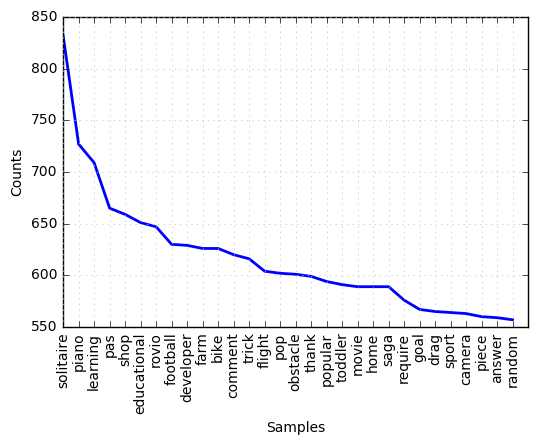

In [41]:
freq1.plot(30)

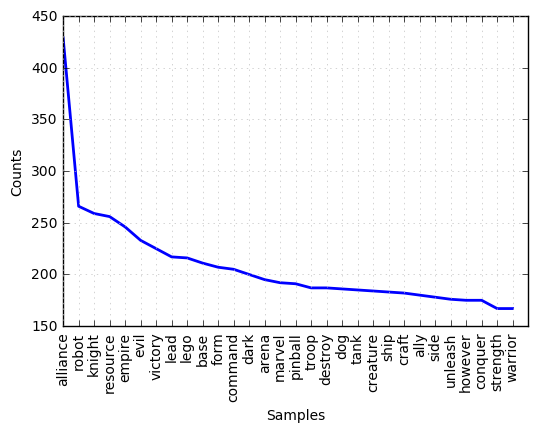

In [42]:
freq2.plot(30)

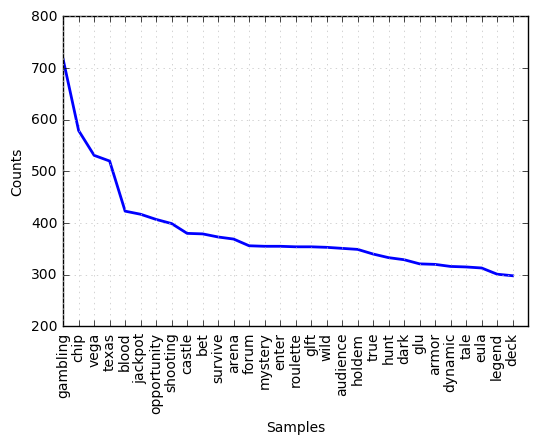

In [43]:
freq3.plot(30)

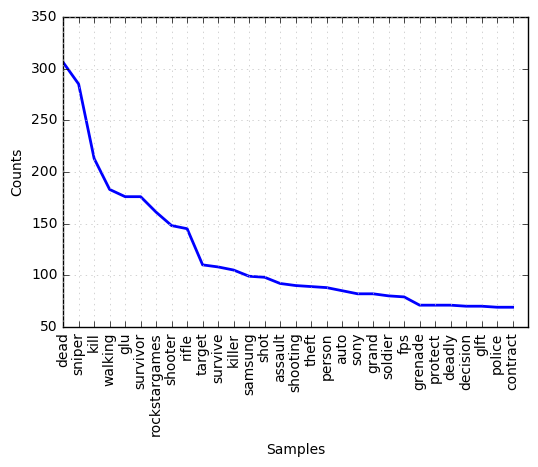

In [44]:
freq4.plot(30)

In [40]:
freqlist = [freq1,freq2,freq3,freq4]